<a href="https://colab.research.google.com/github/marcin-mulawa/deep_learning-cdv/blob/main/2.%20shallow_net_in_pytorch/2.%20shallow_net_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Płytka sieć neuronowa w PyTorch

### Zaimportujmy zależności

In [1]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt

### Załadujmy dane i od razu przeskalujmy (funkcja ToTensor konwertuje piksele z [0,255] na [0,1]

In [2]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

### Sprawdźmy jak wyglądają dane

In [3]:
train.data.shape

torch.Size([60000, 28, 28])

In [4]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### Zobaczmy konkretne wartości

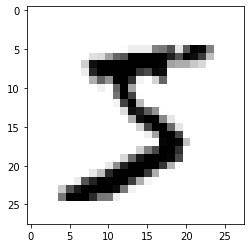

In [6]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [7]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [8]:
train.targets.shape

torch.Size([60000])

In [9]:
test.data.shape

torch.Size([10000, 28, 28])

In [10]:
test.targets.shape

torch.Size([10000])

### Popaczkujmy zbiór danych z wykorzystaniem klasy DataLoader i przejrzyjmy paczki

In [11]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128) 

In [12]:
n_batches = len(train_loader)
n_batches

469

In [13]:
n_test_batches = len(test_loader)
n_test_batches

79

In [14]:
X_sample, y_sample = iter(train_loader).next()

In [15]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [16]:
y_sample.shape

torch.Size([128])

In [17]:
y_sample

tensor([1, 6, 3, 0, 4, 7, 2, 5, 8, 3, 4, 2, 4, 5, 8, 8, 3, 2, 5, 4, 8, 0, 8, 8,
        8, 9, 9, 1, 3, 7, 8, 1, 2, 3, 9, 8, 6, 7, 4, 6, 1, 1, 2, 7, 7, 1, 4, 8,
        5, 4, 9, 0, 7, 7, 7, 4, 9, 8, 3, 5, 4, 1, 7, 1, 9, 3, 0, 3, 0, 7, 8, 7,
        4, 7, 1, 6, 6, 1, 6, 8, 1, 7, 7, 2, 4, 9, 9, 2, 5, 6, 4, 1, 8, 4, 8, 7,
        5, 0, 1, 9, 6, 1, 1, 8, 5, 0, 4, 0, 1, 8, 0, 6, 6, 1, 5, 7, 9, 6, 2, 7,
        8, 9, 5, 4, 4, 5, 7, 5])

In [18]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Spłaszczamy paczkę 
(niespodzianie służy do tego funkcja .view())

In [19]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1)

In [20]:
X_flat_sample.shape

torch.Size([128, 784])

In [21]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### Czas na zaprojektowanie architektury sieci

PyTorch opiera się na modułach (obiektach klasy `torch.nn.Module`), które są łączone w graf obliczeń. Moduły mogą wykorzystywać parametry (obiekty klasy `torch.nn.Parameter`), dla których mogą być automatycznie liczone gradienty i które mogą podlegać optymalizacji.

**Zadanie 1. Zadeklaruj odpowiedni rozmiar wejścia i wyjścia tak, by warstwa wejściowa przyjęła pojedynczo wszystkie piksele obrazka, a warstwa wyjściowa mogła reprezentować każdą z klas**

In [22]:
n_input = 28*28
n_dense = 64
n_out = 10

Tworzymy model, składający się sekwencji warstw: wejściowej warstwy liniowej czyli warstwy implementującej operację $\hat{y} = Wx + b$, (zwróćmy uwagę na jej liczbę wejść i wyjść), ukrytej warstwy gęstej o 64 neuronach z sigmoidalną funkcją aktywacji oraz wyjściowej warstwy liniowej (tu również zwróćmy uwagę na liczbę wejść)

In [23]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),
    nn.Sigmoid(),
    nn.Linear(n_dense, n_out)
)

In [24]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


### Skonfigurujmy hiperparametry

**Zadanie 2. Zajrzyj do dokumentacji biblioteki torch i zadeklaruj entropię skrośną (CrossEntropy) jako funkcję straty oraz SGD jako algorytm optymalizacji - z parametrami modelu jako parametrami do optymalizacji, oraz ze stałą uczenia równą 0.01**

In [25]:
cost_fxn = nn.CrossEntropyLoss()

In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Zdefinujmy metrykę trafności prognozy

In [27]:
def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1)
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0

### Wreszcie nauczmy sieć 
(zwróćmy zwłaszcza uwagę na to co się dzieje w zagnieżdżonej pętli)

In [28]:
n_epochs = 20 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
  
  avg_cost = 0.0
  avg_accuracy = 0.0
  
  for i, (X, y) in enumerate(train_loader): # enumerate() pozwala iterować po całym popaczkowanym zbiorze  
    
    # wykonujemy feed-forward:
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    cost = cost_fxn(y_hat, y)
    avg_cost += cost / n_batches
    
    # propagacja wsteczna i optymalizacja poprzez algorytm spadku gradientu: 
    optimizer.zero_grad() # ustawiamy gradienty w sieci na zero; .backward() accumulates them in buffers
    cost.backward() #obliczamy i zbieramy gradienty
    optimizer.step() #aktualizujemy wagi z wykorzystaniem zebranych gradientów
    
    # obliczamy wartości wyznaczonej wcześniej metryki:
    accuracy = accuracy_pct(y_hat, y)
    avg_accuracy += accuracy / n_batches
    
    if (i + 1) % 100 == 0:
      print('Step {}'.format(i + 1))
    
  print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'
        .format(epoch + 1, n_epochs, avg_cost, avg_accuracy)) 

print('Training complete.')

Training for 20 epochs. 

Step 100
Step 200
Step 300
Step 400
Epoch 1/20 complete: Cost: 1.366, Accuracy: 68.0% 

Step 100
Step 200
Step 300
Step 400
Epoch 2/20 complete: Cost: 0.535, Accuracy: 87.1% 

Step 100
Step 200
Step 300
Step 400
Epoch 3/20 complete: Cost: 0.403, Accuracy: 89.3% 

Step 100
Step 200
Step 300
Step 400
Epoch 4/20 complete: Cost: 0.351, Accuracy: 90.3% 

Step 100
Step 200
Step 300
Step 400
Epoch 5/20 complete: Cost: 0.322, Accuracy: 91.0% 

Step 100
Step 200
Step 300
Step 400
Epoch 6/20 complete: Cost: 0.302, Accuracy: 91.5% 

Step 100
Step 200
Step 300
Step 400
Epoch 7/20 complete: Cost: 0.286, Accuracy: 91.9% 

Step 100
Step 200
Step 300
Step 400
Epoch 8/20 complete: Cost: 0.273, Accuracy: 92.2% 

Step 100
Step 200
Step 300
Step 400
Epoch 9/20 complete: Cost: 0.262, Accuracy: 92.5% 

Step 100
Step 200
Step 300
Step 400
Epoch 10/20 complete: Cost: 0.252, Accuracy: 92.8% 

Step 100
Step 200
Step 300
Step 400
Epoch 11/20 complete: Cost: 0.243, Accuracy: 93.0% 

Step

### Testujemy model

**Zadanie 3. Zaimplementuj w gotowej pętli obliczanie trafności na całym zbiorze testowym z wykorzystaniem funkcji accuracy_pct**

In [29]:
model.eval()

with torch.no_grad(): # dezyaktywacja klasy autograd która oblicza pochodne i rejestruje graf wszystkich operacji wykonanych na tensorze, w tym przypadku chcemy zaoszczędzić pamięc
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # dokonujemy prognozy: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # obliczamy koszt: 
    cost = cost_fxn(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # tu odpowiedź - obliczamy trafność:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

Test cost: 0.184, Test accuracy: 94.6%
